In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

data = pd.read_csv("customer_data.csv")
data.head(10)


,Age,Income,Gender,Marital Status,Purchase
0,58,93000,Male,Married,1
1,25,48785,Female,Married,1
2,19,62504,Female,Married,1
3,65,27331,Female,Single,0
4,35,50021,Female,Married,1
5,33,24207,Female,Single,1
6,32,61347,Male,Married,1
7,26,72581,Male,Married,1
8,65,55093,Male,Single,0
9,24,28675,Male,Married,0


In [13]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])

Accuracy: 0.47
Precision: 0.58
Recall: 0.58
F1 Score: 0.58


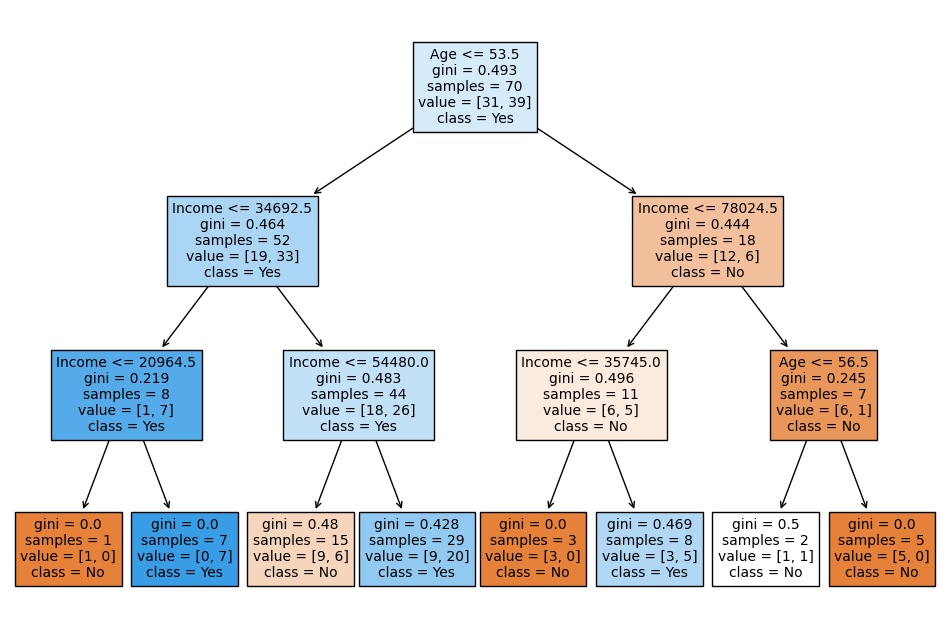

In [14]:
label_encoders = {}
categorical_cols = ['Gender', 'Marital Status']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

X = data.drop('Purchase', axis=1)
y = data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.show()